In [1]:
from src.read import read_csv
from src.models import (
    preprocess_normalize_data,
    train_evaluate_linear_regression,
    train_evaluate_polynomial_regression,
    zscore_normalize,
    train_evaluate_zscore_normalization,
    perform_hyperparameter_tuning,
    perform_rf_hyperparameter_tuning,
    train_evaluate_random_forest,
)
import matplotlib.pyplot as plt
import numpy as np

data = read_csv("data/train.csv")
x_train, y_train = preprocess_normalize_data(data=data, target_column="medv")
import pandas as pd

overall_results = [
    {
        "Model": "Linear",
        "MSE Before": 0,
        "MSE After": 0,
        "RMSE Before": 0,
        "RMSE After": 0,
        "MAE Before": 0,
        "MAE After": 0,
    },
    {
        "Model": "Polynomial",
        "MSE Before": 0,
        "MSE After": 0,
        "RMSE Before": 0,
        "RMSE After": 0,
        "MAE Before": 0,
        "MAE After": 0,
    },
    {
        "Model": "Z-Score",
        "MSE Before": 0,
        "MSE After": 0,
        "RMSE Before": 0,
        "RMSE After": 0,
        "MAE Before": 0,
        "MAE After": 0,
    },
    {
        "Model": "Random Forest",
        "MSE Before": 0,
        "MSE After": 0,
        "RMSE Before": 0,
        "RMSE After": 0,
        "MAE Before": 0,
        "MAE After": 0,
    },
]

In [2]:
def draw_scatter_plot(x, y, predictions, xlabel, ylabel, title):
    plt.figure(figsize=(10,5))
    plt.scatter(x, y, color='blue', label='Actual Prices', alpha=0.7)
    plt.scatter(x, predictions, color='red', label='Predicted Prices', alpha=0.7)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

def populate_overall_results(index, results):
    dictionary = {
        "MSE Before": 'train_mse',
        "RMSE Before": 'train_rmse',
        "MAE Before": 'train_mae',
        "MSE After": 'test_mse',
        "RMSE After": 'test_rmse',
        "MAE After": 'test_mae'
    }
    for key, value in dictionary.items():
        if value in results:
            overall_results[index][key] = results[value]


Linear Regression:

TRAIN SET:
MSE: 159.25154782504544
RMSE: 12.61949079103612
MAE: 10.73741130535548

TEST SET:
MSE: 159.22490907831863
RMSE: 12.618435286449689
MAE: 10.84008902621688


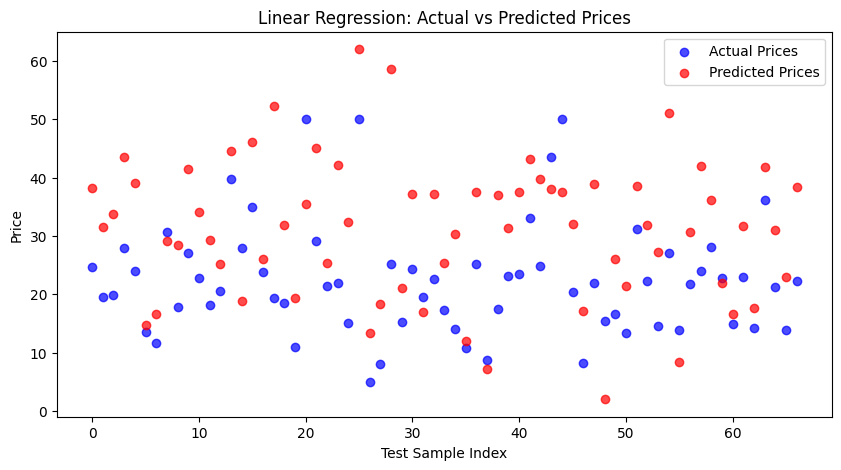

In [3]:
print("Linear Regression:")
sgdr, X_test, y_test, y_test_pred, results = train_evaluate_linear_regression(x_train, y_train)
populate_overall_results(0, results)

indices = np.arange(len(y_test))
draw_scatter_plot(indices, y_test, y_test_pred, "Test Sample Index", "Price", "Linear Regression: Actual vs Predicted Prices")

Polynomial Regression:

TRAIN SET:
MSE: 14.036050695489227
RMSE: 3.7464717662741336
MAE: 2.6555724758115655

TEST SET:
MSE: 12.097670242154933
RMSE: 3.4781705309192263
MAE: 2.6123296953005593


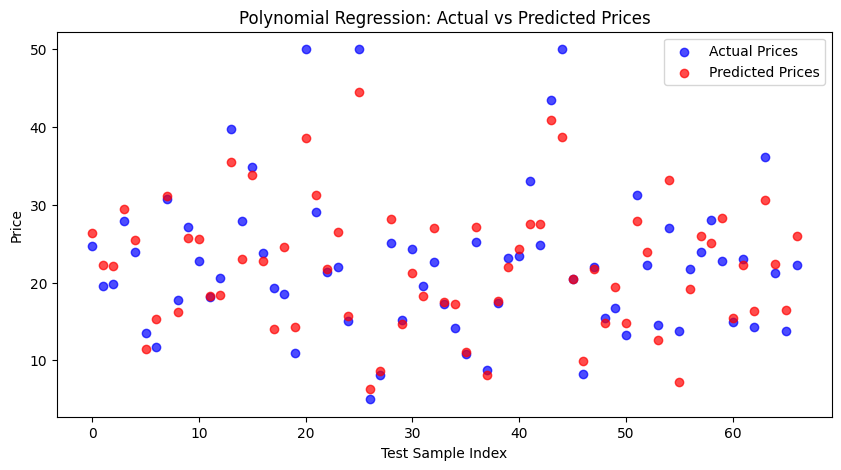

In [4]:
print("Polynomial Regression:")
sgdr, X_test, y_test, y_test_pred, results = train_evaluate_polynomial_regression(x_train, y_train)
populate_overall_results(1, results)

indices = np.arange(len(y_test))
draw_scatter_plot(indices, y_test, y_test_pred, "Test Sample Index", "Price", "Polynomial Regression: Actual vs Predicted Prices")

Z-Score Normalization:

TRAIN SET:
MSE: 24.07528770114388
RMSE: 4.906657487653268
MAE: 3.3510131207416176

TEST SET:
MSE: 20.829937316661514
RMSE: 4.5639826157273555
MAE: 3.2749588338306848


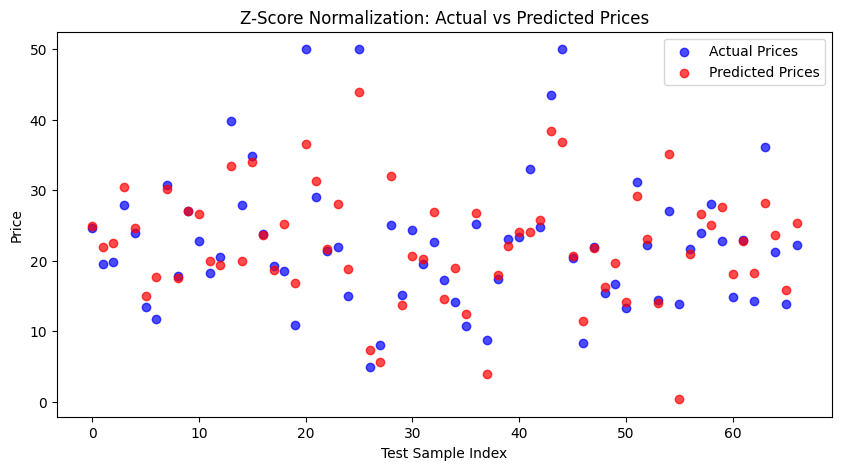

In [5]:
x_norm, mean, sigma = zscore_normalize(x_train)
print("Z-Score Normalization:")
sgdr, X_test, y_test, y_test_pred, results = train_evaluate_zscore_normalization(x_norm, y_train)
populate_overall_results(2, results)
draw_scatter_plot(indices, y_test, y_test_pred, "Test Sample Index", "Price", "Z-Score Normalization: Actual vs Predicted Prices")

Random Forest Model:

TRAIN SET:
MSE: 1.7834638834586454
RMSE: 1.3354639206877306
MAE: 0.9211541353383453

TEST SET:
MSE: 8.115971761194029
RMSE: 2.8488544647268363
MAE: 2.110746268656716


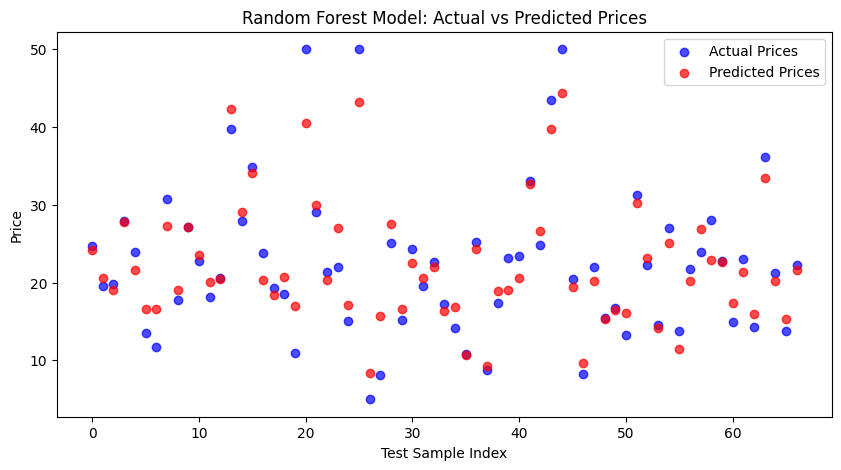

In [6]:
print("Random Forest Model:")
rf, X_test, y_test, y_test_pred, results = train_evaluate_random_forest(x_train, y_train, params={})
populate_overall_results(3, results)
draw_scatter_plot(indices, y_test, y_test_pred, "Test Sample Index", "Price", "Random Forest Model: Actual vs Predicted Prices")

# After Hyperparameter tuning

Linear regression

TRAIN SET:
MSE: 159.25154782504544
RMSE: 12.61949079103612
MAE: 10.73741130535548

TEST SET:
MSE: 159.22490907831863
RMSE: 12.618435286449689
MAE: 10.84008902621688


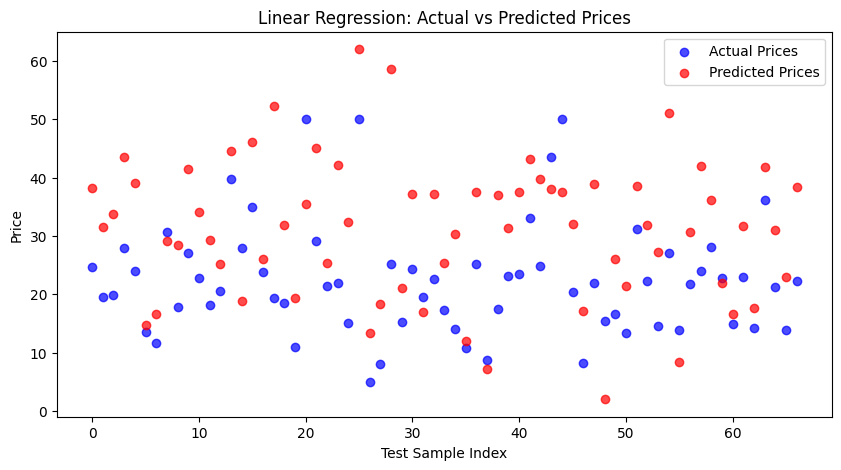

Polynomial regression

TRAIN SET:
MSE: 14.036050695489227
RMSE: 3.7464717662741336
MAE: 2.6555724758115655

TEST SET:
MSE: 12.097670242154933
RMSE: 3.4781705309192263
MAE: 2.6123296953005593


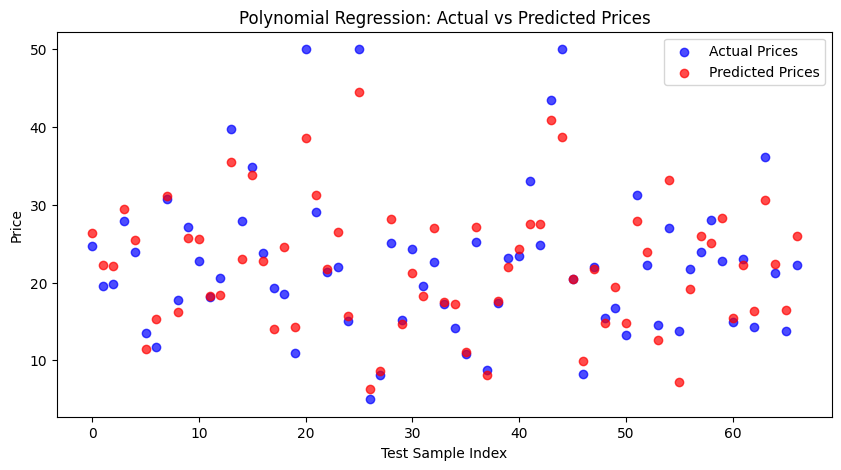

Z-Score Normalization

TRAIN SET:
MSE: 24.07528770114388
RMSE: 4.906657487653268
MAE: 3.3510131207416176

TEST SET:
MSE: 20.829937316661514
RMSE: 4.5639826157273555
MAE: 3.2749588338306848


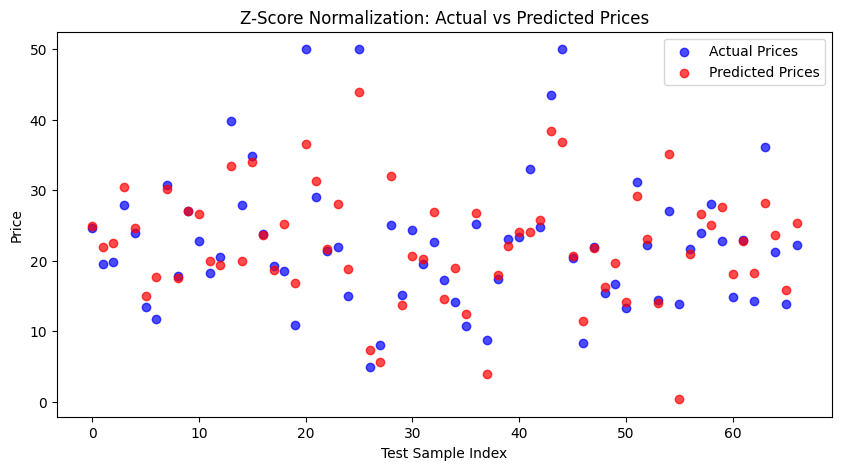

Random Forest Hyperparameter Tuning:

TRAIN SET:
MSE: 3.4861056802500574
RMSE: 1.8671115875196258
MAE: 1.3982490444340738

TEST SET:
MSE: 7.583358394306505
RMSE: 2.7537898239165792
MAE: 2.0940991258561024


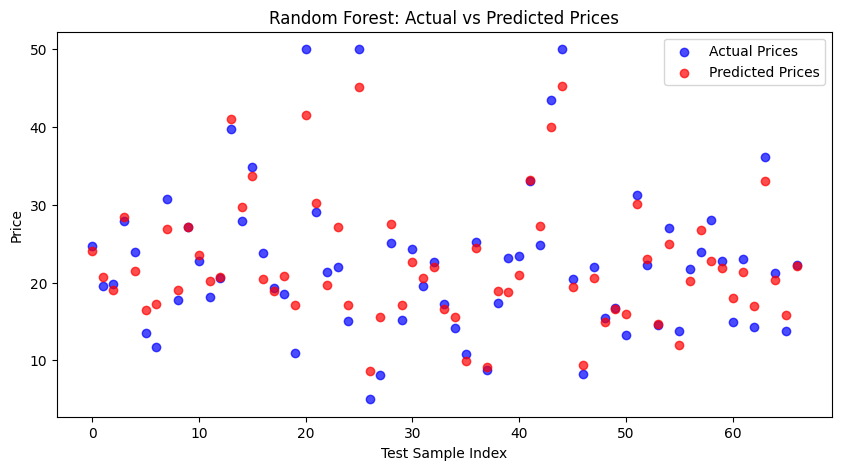

In [8]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

linear_best_params = perform_hyperparameter_tuning(x_train, y_train, pipeline_type='linear')
print("Linear regression")
sgdr, X_test, y_test, y_test_pred, results = train_evaluate_linear_regression(x_train, y_train, params=linear_best_params)
populate_overall_results(0, results)
indices = np.arange(len(y_test))
draw_scatter_plot(indices, y_test, y_test_pred, "Test Sample Index", "Price", "Linear Regression: Actual vs Predicted Prices")

print("Polynomial regression")
polynomial_best_params = perform_hyperparameter_tuning(x_train, y_train, pipeline_type='polynomial')
sgdr, X_test, y_test, y_test_pred, results = train_evaluate_polynomial_regression(x_train, y_train, params=polynomial_best_params)
populate_overall_results(1, results)

draw_scatter_plot(indices, y_test, y_test_pred, "Test Sample Index", "Price", "Polynomial Regression: Actual vs Predicted Prices")

print("Z-Score Normalization")
zscore_best_params = perform_hyperparameter_tuning(x_train, y_train)
sgdr, X_test, y_test, y_test_pred, results = train_evaluate_zscore_normalization(x_norm, y_train, params=zscore_best_params)
populate_overall_results(2, results)
draw_scatter_plot(indices, y_test, y_test_pred, "Test Sample Index", "Price", "Z-Score Normalization: Actual vs Predicted Prices")

print("Random Forest Hyperparameter Tuning:")
rf_best_params = perform_rf_hyperparameter_tuning(x_train, y_train)
sgdr, X_test, y_test, y_test_pred, results = train_evaluate_random_forest(x_train, y_train, params=rf_best_params)
populate_overall_results(3, results)
draw_scatter_plot(indices, y_test, y_test_pred, "Test Sample Index", "Price", "Random Forest: Actual vs Predicted Prices")

In [9]:
df = pd.DataFrame(overall_results)
display(df)

,Model,MSE Before,MSE After,RMSE Before,RMSE After,MAE Before,MAE After
0,Linear,159.251548,159.224909,12.619491,12.618435,10.737411,10.840089
1,Polynomial,14.036051,12.097670,3.746472,3.478171,2.655572,2.612330
2,Z-Score,24.075288,20.829937,4.906657,4.563983,3.351013,3.274959
3,Random Forest,3.486106,7.583358,1.867112,2.753790,1.398249,2.094099
